<a href="https://colab.research.google.com/github/sudar-coder321/KMeans_vs_KMedoid/blob/main/CB_EN_U4CSE18258_MLDM_KMeans_KMedoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Name -** Sudarshan M S
### **Roll NO -** CB.EN.U4CSE18258
### **MLDM Assignment -** K Means and K Medoid Clustering

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 4.9 MB/s 
     |████████████████████████████████| 23.1 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


### Import Statements

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
%matplotlib inline

### Algorithm

### Importing Dataset

In [ ]:
df = pd.read_csv('coimbatore.csv')

In [ ]:
df.dtypes

X             float64
Y             float64
Unnamed: 2    float64
dtype: object

### Exploring Dataset

In [ ]:
df

,X,Y,Unnamed: 2
0,76.95446,10.88176,NaN
1,76.96292,10.85913,NaN
2,76.96898,10.86515,NaN
3,76.97412,10.86712,NaN
4,76.97384,10.86967,NaN
...,...,...,...
4082,76.93404,10.95027,NaN
4083,76.93019,10.95258,NaN
4084,76.92850,10.94958,NaN
4085,76.93156,10.94627,NaN


In [ ]:
df.head()

,X,Y,Unnamed: 2
0,76.95446,10.88176,NaN
1,76.96292,10.85913,NaN
2,76.96898,10.86515,NaN
3,76.97412,10.86712,NaN
4,76.97384,10.86967,NaN


In [ ]:
x = df.iloc[:, [0, 1]].values

In [ ]:
df.columns

Index(['X', 'Y', 'Unnamed: 2'], dtype='object')

In [ ]:
x

array([[76.95446, 10.88176],
       [76.96292, 10.85913],
       [76.96898, 10.86515],
       ...,
       [76.9285 , 10.94958],
       [76.93156, 10.94627],
       [76.9343 , 10.94833]])

In [ ]:
df.tail()

,X,Y,Unnamed: 2
4082,76.93404,10.95027,NaN
4083,76.93019,10.95258,NaN
4084,76.92850,10.94958,NaN
4085,76.93156,10.94627,NaN
4086,76.93430,10.94833,NaN


In [ ]:
df.nunique()

X             2087
Y             2052
Unnamed: 2       3
dtype: int64

In [ ]:
df.isnull()

,X,Y,Unnamed: 2
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
4082,False,False,True
4083,False,False,True
4084,False,False,True
4085,False,False,True


In [ ]:
len(df.isnull())

4087

In [ ]:
df.describe()

,X,Y,Unnamed: 2
count,4087.000000,4087.000000,3.000000
mean,76.950988,10.999980,7.133136
std,0.048409,0.049317,6.607295
min,76.721080,10.812330,0.102649
25%,76.923000,10.988340,4.092400
50%,76.949630,11.014100,8.082150
75%,76.970560,11.024090,10.648380
max,77.211130,11.243560,13.214610


In [ ]:
df['X'].mean()

76.95098759970682

In [ ]:
df['X'].mode()

0    76.96663
dtype: float64

In [ ]:
df['X'].median()

76.94963

In [ ]:
df['Y'].median()

11.0141

In [ ]:
df['Y'].mean()

10.999980220210428

In [ ]:
df['Y'].mode()

0    11.02102
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           4087 non-null   float64
 1   Y           4087 non-null   float64
 2   Unnamed: 2  3 non-null      float64
dtypes: float64(3)
memory usage: 95.9 KB


### Preprocessing

In [ ]:
df = df.drop(columns = 'Unnamed: 2')

In [ ]:
df.isnull().sum()

X    0
Y    0
dtype: int64

In [ ]:
df

,X,Y
0,76.95446,10.88176
1,76.96292,10.85913
2,76.96898,10.86515
3,76.97412,10.86712
4,76.97384,10.86967
...,...,...
4082,76.93404,10.95027
4083,76.93019,10.95258
4084,76.92850,10.94958
4085,76.93156,10.94627


In [ ]:
type(df)

pandas.core.frame.DataFrame

### Elbow Plot

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for k in range(1, 100):
    kmeansModel = KMeans(n_clusters=k,init='k-means++').fit(df)
    kmeansModel.fit(df)
 
    distortions.append(sum(np.min(cdist(df, kmeansModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeansModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df, kmeansModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeansModel.inertia_

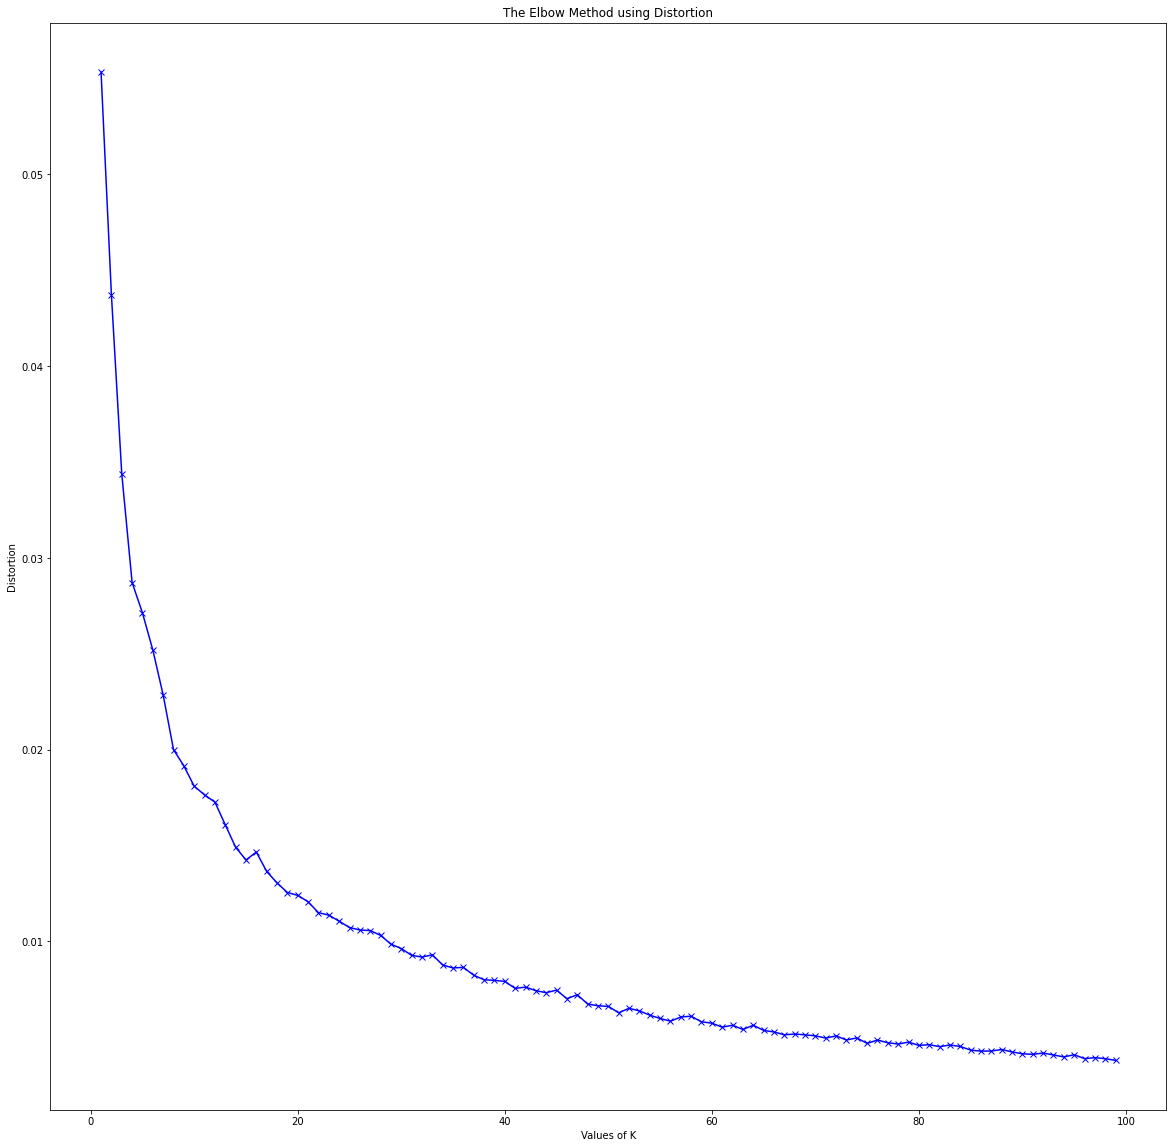

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(range(1,100), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### KMeans

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++', random_state=256) 
df = df.values
y_kmeans = kmeans.fit_predict(df)


### Algorithm

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

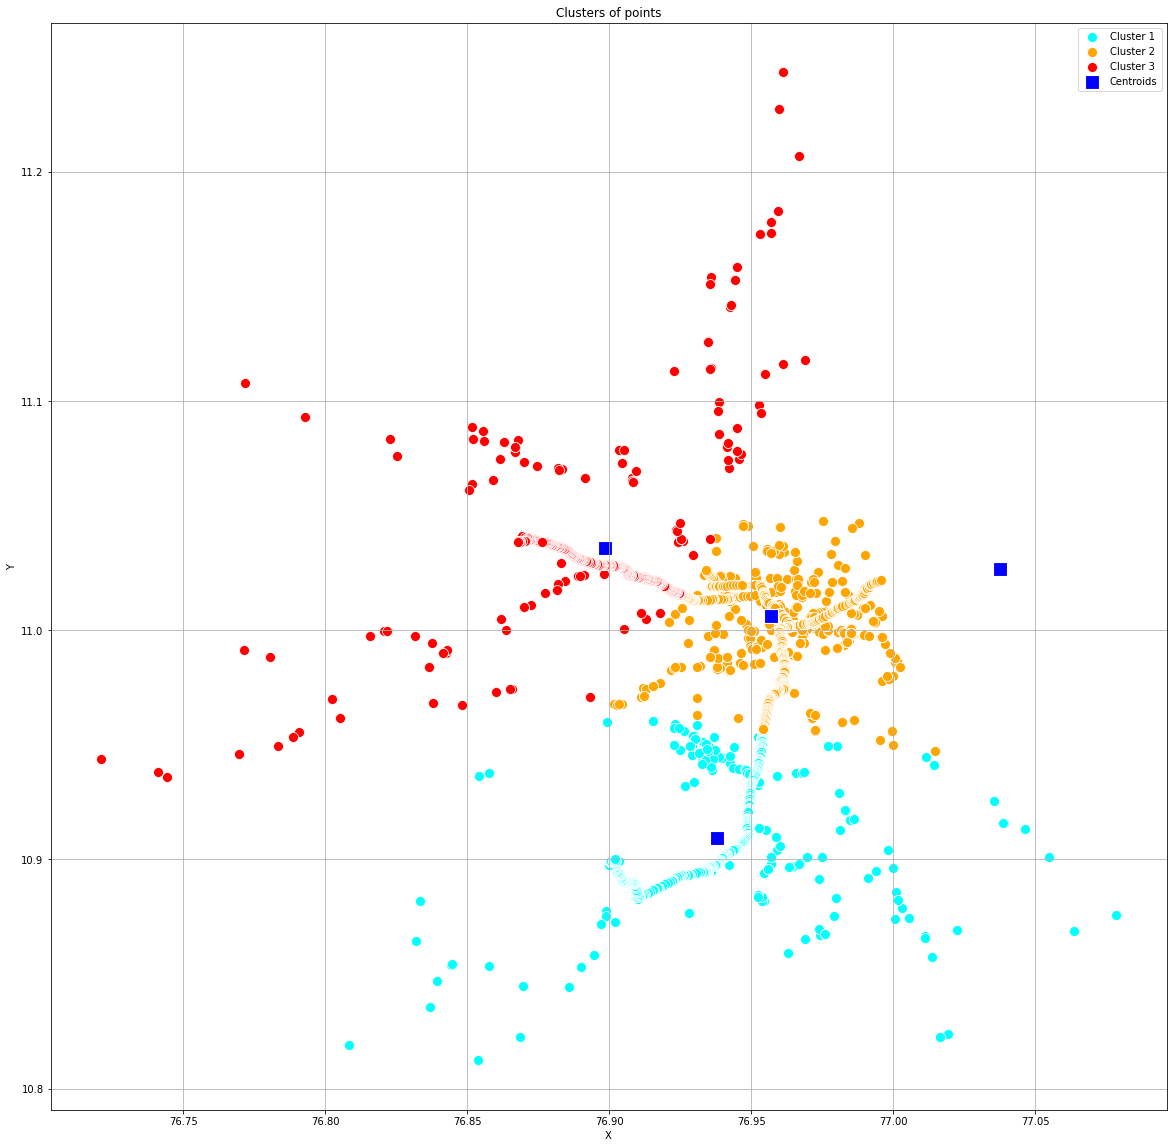

In [ ]:
plt.figure(figsize=(20,20))

sns.scatterplot(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], color = 'cyan', label = 'Cluster 1',s=100)
sns.scatterplot(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], color = 'orange', label = 'Cluster 2',s=100)
sns.scatterplot(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], color = 'red', label = 'Cluster 3',s=100)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'blue',label = 'Centroids',s=200,marker=',')

plt.grid(True)
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### K-Medoid 

In [ ]:
cobj = KMedoids(n_clusters=4).fit(df)
labels = cobj.labels_

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)


Text(0.5, 1.0, 'KMedoids clustering. The Medoids have been represented in blue.')

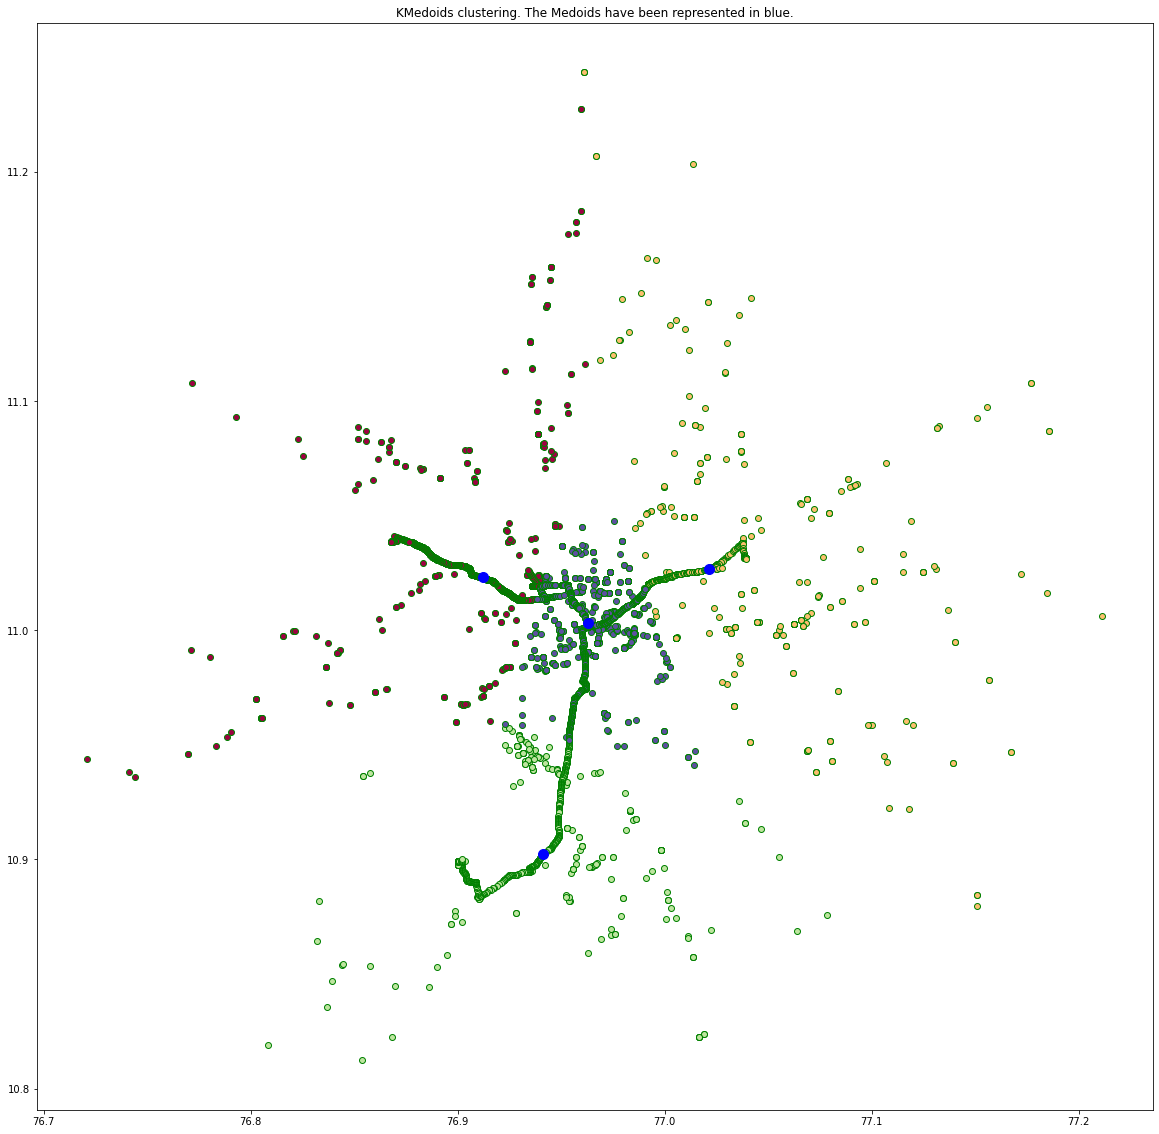

In [ ]:
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
plt.figure(figsize=(20,20))
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = df[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="g",
        markersize=6,
    )

plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="blue",
    markeredgecolor="b",
    markersize=10,
)
plt.title("KMedoids clustering. The Medoids have been represented in blue.")